一、研究主題:台灣etf投資人對國際事務之反應

二、專案目標:近年來發生許多國際事務，甚至影響到各國股市，台灣媒體也逐漸提升重要國際新聞的曝光機會，可能成為台灣股市投資人判斷股市走向。因此希望透過資料分析探討台灣人是否會因為重要國際事務而調整自己投資台灣ETF的策略?

三、研究方式: 透過PYTHON進行資料找尋、整理和分析，並用matplotlib製作出視覺化圖表，以判斷國際事務和台灣ETF每日的交易資訊的關係

四、研究步驟:
1. 設定想研究的資料目標、事件和資料範圍(時間、項目)
2. 透過爬蟲cnn國際版面，找出發生BREXIT、TRUMP、NORTH KOREA三事件的次數、日期
3. 視覺化呈現BREXIT、TRUMP、NORTH KOREA三事件的次數、日期
4. 透過爬蟲台灣證交所網站，找出有關台灣元大50(0050) ETF的交易資料
5. 計算台灣元大50(0050) ETF 2016/1/15至2019/4/8之間交易日的trading_shares、changing、end_price、number_of_deals的平均及標準差
6. 統整發生BREXIT、TRUMP、NORTH KOREA三事件時當天的台灣元大50(0050) ETF交易資料
7. 視覺化呈現「發生BREXIT、TRUMP、NORTH KOREA三事件時」的trading_shares、changing、end_price、number_of_deals的平均及標準差
8. 視覺化呈現漲跌幅跟是否發生國際事務的關係
9. 整理結論、提出假設
10. 未來展望、心得回顧


1.設定想研究的資料目標、事件和資料範圍(時間、項目)
我希望歐洲、美國、亞洲重要事件對台灣股市的影響，故優先研究英國脫歐、川普上台和北韓問題議題
時間範圍則從脫歐公投、川普選舉、北韓頻頻試射等議題開始廣泛宣傳的2016年至今日

2.透過爬蟲cnn國際版面，找出發生BREXIT、TRUMP、NORTH KOREA三事件的次數、日期
從CNN(https://edition.cnn.com/sitemaps/article...)尋找2016/01~2019/04的新聞標題網址，以cnn_loc_list儲存

In [9]:
import sys
import os
import requests, json, csv, datetime
import re
import time
from xlwt import *
import pickle
import requests
from datetime import datetime
from bs4 import BeautifulSoup
cnn_loc_list = []
year_count_list = ["2016",'2017','2018']
month_count_list = ['01','02','03','04','05','06','07','08','09','10','11','12']
spe_2019_month_count_list = ['01','02','03','04']
day_count_list = []
for year in year_count_list:
    for month in month_count_list:
        cnn_url_twse = 'https://edition.cnn.com/sitemaps/article-'+year+'-'+month+'.xml'
        cnn_res = requests.get(cnn_url_twse)
        cnn_res.encoding = "UTF-8"
        cnn_soup = BeautifulSoup(cnn_res.text)
        #print(cnn_soup)
        cnn_loc_list_o = cnn_soup.find_all("loc")
        for l in cnn_loc_list_o:
            cn1 = l.contents[0]
            cnn_loc_list.append(cn1)

for mon in spe_2019_month_count_list:
    cnn_url_twse = 'https://edition.cnn.com/sitemaps/article-2019-'+mon+'.xml'
    cnn_res = requests.get(cnn_url_twse)
    cnn_res.encoding = "UTF-8"
    cnn_soup = BeautifulSoup(cnn_res.text)
    #print(cnn_soup)
    cnn_loc_list_o = cnn_soup.find_all("loc")
    for l in cnn_loc_list_o:
        cn1 = l.contents[0]
        cnn_loc_list.append(cn1)
#print(cnn_loc_list)

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file c:\users\will\appdata\local\programs\python\python36-32\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


整理資料
製作dict整理發生事件、時間和次數
放每天發生三事件的網址:
negative_event_list_day_dict = {"年月日":{'brexit':[],'trump':[],'north-korea':[]},"年月日":{'brexit':[],'trump':[],'north-korea':[]}}

In [10]:
import datetime
today = datetime.date.today()
date_list = []
data_size_date = 1180
for i in range(1,data_size_date):
    date = today - datetime.timedelta(days=i)
    date = date.strftime("%Y-%m-%d %H:%M:%S")
    str_date = date[0]+date[1]+date[2]+date[3]+"/"+date[5]+date[6]+"/"+date[8]+date[9]
    date_list.append(str_date)
print(str_date)
event_list_day_dict = {}
negative_event_list_day_dict = {}
negative_event_counts_day_dict = {}
total_negative_counts_day_dict = {}
negative_event_day_dict = {}
for j in range(data_size_date-1):
    event_list_day_dict[str(date_list[j])] = []
    negative_event_list_day_dict[str(date_list[j])] = {'brexit':[],'trump':[],'north-korea':[]}
    negative_event_counts_day_dict[str(date_list[j])] = {'brexit':0,'trump':0,'north-korea':0}
    total_negative_counts_day_dict[str(date_list[j])] = 0
# print(negative_event_list_day_dict)
# print(negative_event_counts_day_dict)
# print(event_list_day_dict[str(date_list[422])])
#print(total_negative_counts_day_dict)

2016/02/15


In [11]:
#print(cnn_loc_list)
#將標題依照日期放入 event_list_day_dict
for loc in cnn_loc_list:
    for f in range(data_size_date-1):
        if str(date_list[f]) in loc:
             event_list_day_dict[str(date_list[f])].append(loc)
#print(event_list_day_dict)
f = -1
for day in range(data_size_date-1):
    f += 1
    for ev_li in event_list_day_dict[str(date_list[f])]:
        for s in negative_event_list_day_dict[str(date_list[f])]:
            if s in ev_li:
                negative_event_list_day_dict[str(date_list[f])][s].append(ev_li)
                negative_event_counts_day_dict[str(date_list[f])][s] += 1
                total_negative_counts_day_dict[str(date_list[f])] += 1
negative_event_list = [*negative_event_counts_day_dict[str(date_list[34])]]
print(negative_event_list_day_dict[str(date_list[0])])
print(negative_event_counts_day_dict[str(date_list[0])])
print("total_negative_counts:     ",total_negative_counts_day_dict[str(date_list[0])])
print(negative_event_list)

{'brexit': [], 'trump': [], 'north-korea': []}
{'brexit': 0, 'trump': 0, 'north-korea': 0}
total_negative_counts:      0
['brexit', 'trump', 'north-korea']


3.視覺化呈現BREXIT、TRUMP、NORTH KOREA三事件的次數、日期
只呈現2018/3/5~2019/4/8

In [12]:
#-----------------------土法煉鋼做個好看的x軸
import xlrd
import xlwt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
xaxis_t = pd.date_range(start='2018-03-15',end='2019-04-08',freq='3M')
xaxis_list = []
for i in range(1,data_size_date):
    date = today - datetime.timedelta(days=i)
    date = date.strftime("%Y-%m-%d %H:%M:%S")
    if date not in xaxis_t:
        xaxis_list.append(" ")
    else:
        str_date = date[0]+date[1]+date[2]+date[3]+"/"+date[5]+date[6]+"/"+date[8]+date[9]
        xaxis_list.append(str_date)
xaxis_list.append("2018-03-15")
#print(xaxis_list)
negative_event_day_dict = {'brexit':[],'trump':[],'north-korea':[]} 
d = -1
for day in range(data_size_date-1):
    d += 1
    for s in negative_event_list_day_dict[str(date_list[d])]:
        negative_event_day_dict[s].append(negative_event_counts_day_dict[str(date_list[d])][s])

視覺化呈現BREXIT、TRUMP、NORTH KOREA三事件的次數、日期

_day_list done


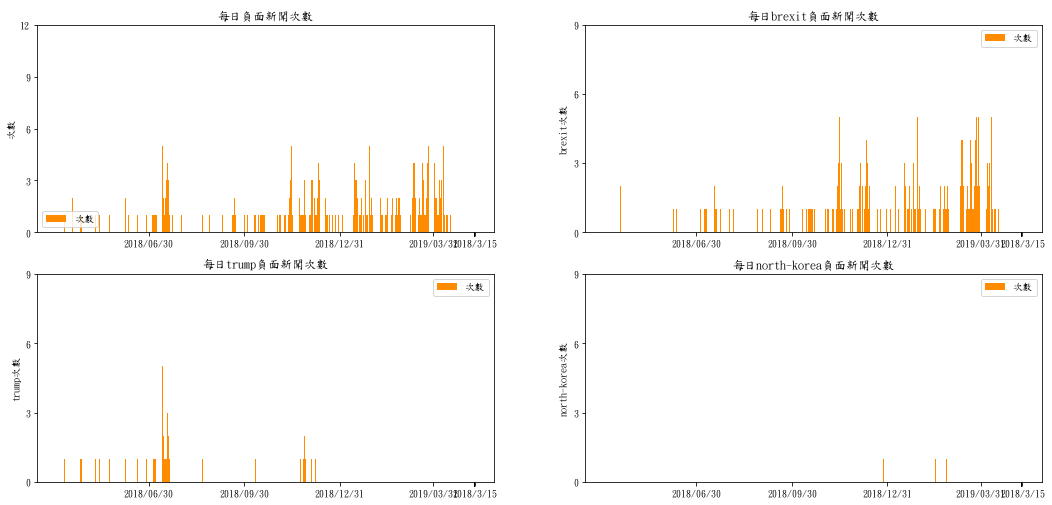

In [13]:
#-------------------第二章子圖
font = {'family' : 'DFKai-SB',
'weight' : 'bold',
'size'  : '10'} #字型設定
plt.rc('font', **font) #字型設定 # pass in the font dict as kwargs
plt.rc('axes',unicode_minus=False) #字型設定
plt.subplots(figsize=(18,13)) #圖形大小
ax1 = plt.subplot(3,2,1)  #子圖們
#第一行第二列图形
ax2 = plt.subplot(3,2,2)
ax3 = plt.subplot(3,2,3)
ax4 = plt.subplot(3,2,4)
brexit_day_list = [*negative_event_day_dict["brexit"]]
trump_day_list = [*negative_event_day_dict["trump"]]
north_korea_day_list = [*negative_event_day_dict["north-korea"]]
total_negative_counts_date = [*total_negative_counts_day_dict] #抓出tw dict的keys
total_negative_counts_day_dict_values = list(total_negative_counts_day_dict.values())
p_brexit_day_list = []
p_trump_day_list = []
p_north_korea_day_list = []
p_total_negative_counts_date = []
p_xaxis_list = ['2018/3/15']
p_total_negative_counts_day_dict_values = []
for p in range(0,400):
    p_brexit_day_list.append(brexit_day_list[p])
    p_trump_day_list.append(trump_day_list[p])
    p_north_korea_day_list.append(north_korea_day_list[p])
    p_total_negative_counts_date.append(total_negative_counts_date[p])    
    p_xaxis_list.append(xaxis_list[p])
    p_total_negative_counts_day_dict_values.append(total_negative_counts_day_dict_values[p])
p_brexit_day_list.reverse()
p_trump_day_list.reverse()
p_north_korea_day_list.reverse()
p_total_negative_counts_date.reverse()
p_xaxis_list.reverse()
#print(p_xaxis_list)
p_total_negative_counts_day_dict_values.reverse()
#print(p_xaxis_list)
#选择ax1
plt.sca(ax1)
#print(total_negative_counts_date)
#total_negative_counts_day_list = []
plt.bar(p_total_negative_counts_date,p_total_negative_counts_day_dict_values,color = 'darkorange', label='次數')
plt.legend(loc='lower left')
plt.ylabel('次數')
plt.title("每日負面新聞次數")
yaxis = np.arange(0,15,3)
#plt.ylim(0,20)
plt.yticks(yaxis)
plt.xticks(p_xaxis_list)
# #plt.xticks(pd.date_range(start='2016/04/22',end='2019/04/06',freq='M'),rotation=90)
#plt.legend()

print("_day_list done")
for a in range(2,5):
    if a == 2:
        plt.sca(ax2)
        topic_day_list = p_brexit_day_list
        #topic_day_list.reverse()
        topic = "brexit"
    if a == 3:
        plt.sca(ax3)
        topic_day_list = p_trump_day_list
        #topic_day_list.reverse()
        topic = "trump"
    if a == 4:
        plt.sca(ax4)
        topic_day_list = p_north_korea_day_list
        #topic_day_list.reverse()
        topic = "north-korea"
    if a == 5:
        plt.sca(ax5)
    if a == 6:
        plt.sca(ax6)
    #topic_day_dict = [*negative_event_day_dict[topic]] #抓出tw dict的keys 多餘
    #print(total_negative_counts_date)
    plt.bar(p_total_negative_counts_date, topic_day_list,color = 'darkorange', label='次數')
    plt.legend(loc='lower left')
    plt.ylabel(str(topic)+'次數')
    plt.title("每日"+str(topic)+"負面新聞次數")
    yaxis = np.arange(0,10,3)
    #plt.ylim(0,20)
    plt.yticks(yaxis)
    plt.xticks(p_xaxis_list)
    plt.legend()
plt.show()


4. 透過爬蟲台灣證交所網站，找出有關台灣元大50(0050) ETF的交易資料

5.計算台灣元大50(0050) ETF 2016/1/15至2019/4/8之間交易日的trading_shares、changing、end_price、number_of_deals的平均及標準差

In [14]:
import statistics
file_r = "ETF0050.csv" #資料們
book_r = xlrd.open_workbook(file_r,encoding_override="utf-8")
sheet_1 = book_r.sheet_by_index(0)
trading_shares_list = []
changing_list = []
end_price_list = []
number_of_deals_list = []
mean_trading_shares = 0
mean_changing = 0
mean_end_price = 0
mean_number_of_deals = 0
stdev_trading_shares = 0
stdev_changing = 0
stdev_end_price = 0
stdev_number_of_deals = 0
# 讀取文件 獲得資料:交易股數、漲幅、收盤價、交易筆數
for p in range(10,796):
    trading_shares = sheet_1.cell_value(rowx=p,colx=1)
    trading_shares = trading_shares.replace(",","")
    trading_shares_list.append(int(trading_shares))
    changing = sheet_1.cell_value(rowx=p,colx=7)
    changing = changing[-4]+changing[-3]+changing[-2]+changing[-1]
    changing_list.append(float(changing))
    end_price = sheet_1.cell_value(rowx=p,colx=6)
    end_price_list.append(float(end_price))
    number_of_deals = sheet_1.cell_value(rowx=p,colx=8)
    number_of_deals = number_of_deals.replace(",","")
    number_of_deals_list.append(int(number_of_deals))
#-------計算普通資料平均值
mean_trading_shares = statistics.mean(trading_shares_list)
mean_changing = statistics.mean(changing_list)
mean_end_price = statistics.mean(end_price_list)
mean_number_of_deals = statistics.mean(number_of_deals_list)
#-------計算普通資料標準差
stdev_trading_shares = statistics.stdev(trading_shares_list)
stdev_changing = statistics.stdev(changing_list)
stdev_end_price = statistics.stdev(end_price_list)
stdev_number_of_deals = statistics.stdev(number_of_deals_list)
#print(sheet_1.cell_value(rowx=10,colx=0))
#print("mean: ",mean_trading_shares,mean_changing,mean_end_price,mean_number_of_deals)
#print("stdev :",stdev_trading_shares,stdev_changing,stdev_end_price,stdev_number_of_deals)

6.統整發生BREXIT、TRUMP、NORTH KOREA三事件時當天的台灣元大50(0050) ETF交易資料

In [15]:
#-------------------取得負面事件當天的etf資料
etf_total_negative_counts_dict = {}
etf_brexit_counts_dict = {}
etf_trump_counts_dict = {}
etf_north_korea_counts_dict = {}
"""
negative_event_counts_day_dict[str(date_list[j])] = {'brexit':0,'trump':0,'north-korea':0}
total_negative_counts_day_dict[str(date_list[j])] = 0
"""
# ={'trading_shares':int(trading_shares),'changing':float(changing),'end_price':float(end_price),'number_of_deals':int(number_of_deals)}
for j in range(data_size_date-1):
    if negative_event_counts_day_dict[str(date_list[j])]['brexit'] != 0:
        date = str(date_list[j])
        date =date.replace("2019","108")
        date = date.replace("2018","107")
        date = date.replace("2017","106")
        date = date.replace("2016","105")
        for p in range(10,796):
            if str(date) == str(sheet_1.cell_value(rowx=p,colx=0)):
                trading_shares = sheet_1.cell_value(rowx=p,colx=1)
                trading_shares = trading_shares.replace(",","")
                changing = sheet_1.cell_value(rowx=p,colx=7)
                if "-" in changing:
                    changing = changing[-4]+changing[-3]+changing[-2]+changing[-1]
                    changing = float(changing)
                    changing = changing*(-1)
                else:
                    changing = changing[-4]+changing[-3]+changing[-2]+changing[-1]
                end_price = sheet_1.cell_value(rowx=p,colx=6)
                number_of_deals = sheet_1.cell_value(rowx=p,colx=8)
                number_of_deals = number_of_deals.replace(",","")
                etf_brexit_counts_dict[str(date_list[j])] = {'trading_shares':int(trading_shares),'changing':float(changing),'end_price':float(end_price),'number_of_deals':int(number_of_deals)}
    if negative_event_counts_day_dict[str(date_list[j])]['trump'] != 0:
        date = str(date_list[j])
        date = date.replace("2019","108")
        date = date.replace("2018","107")
        date = date.replace("2017","106")
        date = date.replace("2016","105")
        for p in range(10,796):
            if str(date) == str(sheet_1.cell_value(rowx=p,colx=0)):
                trading_shares = sheet_1.cell_value(rowx=p,colx=1)
                trading_shares = trading_shares.replace(",","")
                changing = sheet_1.cell_value(rowx=p,colx=7)
                if "-" in changing:
                    changing = changing[-4]+changing[-3]+changing[-2]+changing[-1]
                    changing = float(changing)
                    changing = changing*(-1)
                else:
                    changing = changing[-4]+changing[-3]+changing[-2]+changing[-1]
                end_price = sheet_1.cell_value(rowx=p,colx=6)
                number_of_deals = sheet_1.cell_value(rowx=p,colx=8)
                number_of_deals = number_of_deals.replace(",","")
                etf_trump_counts_dict[str(date_list[j])] = {'trading_shares':int(trading_shares),'changing':float(changing),'end_price':float(end_price),'number_of_deals':int(number_of_deals)}
    if negative_event_counts_day_dict[str(date_list[j])]['north-korea'] != 0:
        date = str(date_list[j])
        date = date.replace("2019","108")
        date = date.replace("2018","107")
        date = date.replace("2017","106")
        date = date.replace("2016","105")
        for p in range(10,796):
            if str(date) == str(sheet_1.cell_value(rowx=p,colx=0)):
                trading_shares = sheet_1.cell_value(rowx=p,colx=1)
                trading_shares = trading_shares.replace(",","")
                changing = sheet_1.cell_value(rowx=p,colx=7)
                if "-" in changing:
                    changing = changing[-4]+changing[-3]+changing[-2]+changing[-1]
                    changing = float(changing)
                    changing = changing*(-1)
                else:
                    changing = changing[-4]+changing[-3]+changing[-2]+changing[-1]
                end_price = sheet_1.cell_value(rowx=p,colx=6)
                number_of_deals = sheet_1.cell_value(rowx=p,colx=8)
                number_of_deals = number_of_deals.replace(",","")
                etf_north_korea_counts_dict[str(date_list[j])] = {'trading_shares':int(trading_shares),'changing':float(changing),'end_price':float(end_price),'number_of_deals':int(number_of_deals)}
    if total_negative_counts_day_dict[str(date_list[j])] != 0:
        date = str(date_list[j])
        date = date.replace("2019","108")
        date = date.replace("2018","107")
        date = date.replace("2017","106")
        date = date.replace("2016","105")
        for p in range(10,796):
            if str(date) == str(sheet_1.cell_value(rowx=p,colx=0)):
                trading_shares = sheet_1.cell_value(rowx=p,colx=1)
                trading_shares = trading_shares.replace(",","")
                changing = sheet_1.cell_value(rowx=p,colx=7)
                if "-" in changing:
                    changing = changing[-4]+changing[-3]+changing[-2]+changing[-1]
                    changing = float(changing)
                    changing = changing*(-1)
                else:
                    changing = changing[-4]+changing[-3]+changing[-2]+changing[-1]
                end_price = sheet_1.cell_value(rowx=p,colx=6)
                number_of_deals = sheet_1.cell_value(rowx=p,colx=8)
                number_of_deals = number_of_deals.replace(",","")
                etf_total_negative_counts_dict[str(date_list[j])] = {'trading_shares':int(trading_shares),'changing':float(changing),'end_price':float(end_price),'number_of_deals':int(number_of_deals)}
#print(etf_total_negative_counts_dict,etf_brexit_counts_dict,etf_trumpt_counts_dict,etf_north_korea_counts_dict)
#print(etf_total_negative_counts_dict)
#---------------跳出時間dict -> {'trading_shares':int(trading_shares),'changing':float(changing),'end_price':float(end_price),'number_of_deals':int(number_of_deals)}
etf_total_negative_counts_dict_2 = list(etf_total_negative_counts_dict.values())
etf_brexit_counts_dict_2 = list(etf_brexit_counts_dict.values())
etf_trump_counts_dict_2 = list(etf_trump_counts_dict.values())
etf_north_korea_counts_dict_2 = list(etf_north_korea_counts_dict.values())
#---------------分etf項目製作list:total_negative
#print(etf_total_negative_counts_dict_2)
trading_shares_total_negative_counts_list = []
changing_total_negative_counts_list = []
end_price_total_negative_counts_list = []
number_of_deals_total_negative_counts_list = []
trading_shares_brexit_counts_list = []
changing_brexit_counts_list = []
end_price_brexit_counts_list = []
number_of_deals_brexit_counts_list = []
trading_shares_trump_counts_list = []
changing_trump_counts_list = []
end_price_trump_counts_list = []
number_of_deals_trump_counts_list = []
trading_shares_north_korea_counts_list = []
changing_north_korea_counts_list = []
end_price_north_korea_counts_list = []
number_of_deals_north_korea_counts_list = []
#---------------
for u in range(len(etf_total_negative_counts_dict_2)):
    trading_shares_total_negative_counts_list.append(etf_total_negative_counts_dict_2[u]['trading_shares'])
    changing_total_negative_counts_list.append(etf_total_negative_counts_dict_2[u]['changing'])
    end_price_total_negative_counts_list.append(etf_total_negative_counts_dict_2[u]['end_price'])
    number_of_deals_total_negative_counts_list.append(etf_total_negative_counts_dict_2[u]['number_of_deals'])
    #---------------分etf項目製作list:brexit
for u in range(len(etf_brexit_counts_dict_2)):
    trading_shares_brexit_counts_list.append(etf_brexit_counts_dict_2[u]['trading_shares'])
    changing_brexit_counts_list.append(etf_brexit_counts_dict_2[u]['changing'])
    end_price_brexit_counts_list.append(etf_brexit_counts_dict_2[u]['end_price'])
    number_of_deals_brexit_counts_list.append(etf_brexit_counts_dict_2[u]['number_of_deals'])
    #---------------分etf項目製作list:trump
for u in range(len(etf_trump_counts_dict_2)):
    trading_shares_trump_counts_list.append(etf_trump_counts_dict_2[u]['trading_shares'])
    changing_trump_counts_list.append(etf_trump_counts_dict_2[u]['changing'])
    end_price_trump_counts_list.append(etf_trump_counts_dict_2[u]['end_price'])
    number_of_deals_trump_counts_list.append(etf_trump_counts_dict_2[u]['number_of_deals'])
    #---------------分etf項目製作list:north_korea
for u in range(len(etf_north_korea_counts_dict_2)):
    trading_shares_north_korea_counts_list.append(etf_north_korea_counts_dict_2[u]['trading_shares'])
    changing_north_korea_counts_list.append(etf_north_korea_counts_dict_2[u]['changing'])
    end_price_north_korea_counts_list.append(etf_north_korea_counts_dict_2[u]['end_price'])
    number_of_deals_north_korea_counts_list.append(etf_north_korea_counts_dict_2[u]['number_of_deals'])


整理計算「發生BREXIT、TRUMP、NORTH KOREA三事件時」的trading_shares、changing、end_price、number_of_deals的平均及標準差

In [16]:
#開始計算mean、stdev
#---------------mean and stdev of total_negative
mean_trading_shares_total_negative = statistics.mean(trading_shares_total_negative_counts_list)
mean_changing_total_negative = statistics.mean(changing_total_negative_counts_list)
mean_end_price_total_negative = statistics.mean(end_price_total_negative_counts_list)
mean_number_of_deals_total_negative = statistics.mean(number_of_deals_total_negative_counts_list)
stdev_trading_shares_total_negative = statistics.stdev(trading_shares_total_negative_counts_list)
stdev_changing_total_negative = statistics.stdev(changing_total_negative_counts_list)
stdev_end_price_total_negative = statistics.stdev(end_price_total_negative_counts_list)
stdev_number_of_deals_total_negative = statistics.stdev(number_of_deals_total_negative_counts_list)
# mean_etf_brexit
mean_trading_shares_brexit = statistics.mean(trading_shares_brexit_counts_list)
mean_changing_brexit = statistics.mean(changing_brexit_counts_list)
mean_end_price_brexit = statistics.mean(end_price_brexit_counts_list)
mean_number_of_deals_brexit = statistics.mean(number_of_deals_brexit_counts_list)
stdev_trading_shares_brexit = statistics.stdev(trading_shares_brexit_counts_list)
stdev_changing_brexit = statistics.stdev(changing_brexit_counts_list)
stdev_end_price_brexit = statistics.stdev(end_price_brexit_counts_list)
stdev_number_of_deals_brexit = statistics.stdev(number_of_deals_brexit_counts_list)
# mean_etf_trump
mean_trading_shares_trump = statistics.mean(trading_shares_trump_counts_list)
mean_changing_trump = statistics.mean(changing_trump_counts_list)
mean_end_price_trump = statistics.mean(end_price_trump_counts_list)
mean_number_of_deals_trump = statistics.mean(number_of_deals_trump_counts_list)
stdev_trading_shares_trump = statistics.stdev(trading_shares_trump_counts_list)
stdev_changing_trump = statistics.stdev(changing_trump_counts_list)
stdev_end_price_trump = statistics.stdev(end_price_trump_counts_list)
stdev_number_of_deals_trump = statistics.stdev(number_of_deals_trump_counts_list)
# mean_etf_north_korea
mean_trading_shares_north_korea = statistics.mean(trading_shares_north_korea_counts_list)
mean_changing_north_korea = statistics.mean(changing_north_korea_counts_list)
mean_end_price_north_korea = statistics.mean(end_price_north_korea_counts_list)
mean_number_of_deals_north_korea = statistics.mean(number_of_deals_north_korea_counts_list)
stdev_trading_shares_north_korea = statistics.stdev(trading_shares_north_korea_counts_list)
stdev_changing_north_korea = statistics.stdev(changing_north_korea_counts_list)
stdev_end_price_north_korea = statistics.stdev(end_price_north_korea_counts_list)
stdev_number_of_deals_north_korea = statistics.stdev(number_of_deals_north_korea_counts_list)
#-------------先印 mean and stdev of total_negative
print("normal_mean:       ",mean_trading_shares,mean_changing,mean_end_price,mean_number_of_deals)
print("normal_stdev :     ",stdev_trading_shares,stdev_changing,stdev_end_price,stdev_number_of_deals)
print("total_negative_mean:",mean_trading_shares_total_negative,mean_changing_total_negative,mean_end_price_total_negative,mean_number_of_deals_total_negative)
print("total_negative_stdev:",stdev_trading_shares_total_negative,stdev_changing_total_negative,stdev_end_price_total_negative,stdev_number_of_deals_total_negative)
print("brexit_mean:       ",mean_trading_shares_brexit,mean_changing_brexit,mean_end_price_brexit,mean_number_of_deals_brexit)
print("brexit_stdev:     ",stdev_trading_shares_brexit,stdev_changing_brexit,stdev_end_price_brexit,stdev_number_of_deals_brexit)
print("trump_mean:       ",mean_trading_shares_trump,mean_changing_trump,mean_end_price_trump,mean_number_of_deals_trump)
print("trump_stdev :     ",stdev_trading_shares_trump,stdev_changing_trump,stdev_end_price_trump,stdev_number_of_deals_trump)
print("north_korea_mean:",mean_trading_shares_north_korea,mean_changing_north_korea,mean_end_price_north_korea,mean_number_of_deals_north_korea)
print("north_korea_stdev : ",stdev_trading_shares_north_korea,stdev_changing_north_korea,stdev_end_price_north_korea,stdev_number_of_deals_north_korea)

normal_mean:        7357586.262086514 0.47029262086513995 75.92105597964377 2202.4173027989823
normal_stdev :      6979297.733183534 0.47051785090675585 7.496965332850208 2086.9233012085
total_negative_mean: 7662506.073529412 0.047058823529411764 76.86121323529412 2347.363970588235
total_negative_stdev: 7513687.129905941 0.7277768986710152 6.291886446368364 2340.1716001095056
brexit_mean:        8067276.122222222 0.08944444444444444 76.04472222222222 2353.9166666666665
brexit_stdev:      6766001.178177879 0.5821120495549974 6.2935909965540064 1605.411236670161
trump_mean:        7159457.3977272725 -0.12954545454545455 77.98125 2345.125
trump_stdev :      8971683.051714716 0.9385007720079729 5.998722625041427 3415.1919816536997
north_korea_mean: 5371155.714285715 0.25 80.33095238095238 2158.1428571428573
north_korea_stdev :  3760212.579769861 0.568770604022395 4.8098460523824516 1590.9942578687794


7. 視覺化呈現「發生BREXIT、TRUMP、NORTH KOREA三事件時」的trading_shares、changing、end_price、number_of_deals的平均及標準差

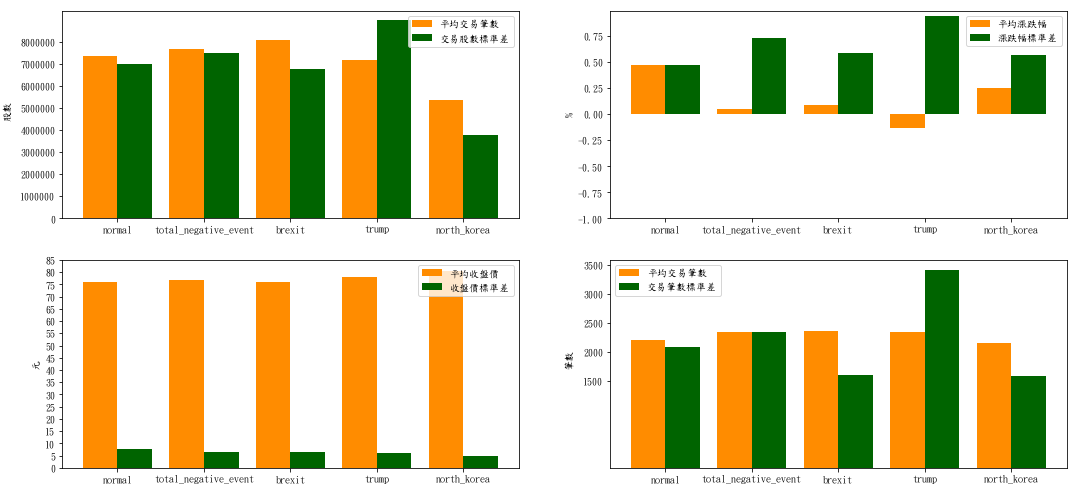

In [17]:
#-----------------製作直方比較圖
font = {'family' : 'DFKai-SB',
'weight' : 'bold',
'size'  : '10'} #字型設定
plt.rc('font', **font) #字型設定 # pass in the font dict as kwargs
plt.rc('axes',unicode_minus=False) #字型設定
plt.subplots(figsize=(18,13)) #圖形大小
ax1 = plt.subplot(3,2,1)  #子圖們
#第一行第二列图形
ax2 = plt.subplot(3,2,2)
ax3 = plt.subplot(3,2,3)
ax4 = plt.subplot(3,2,4)
#ax5 = plt.subplot(3,2,5)
#ax6 = plt.subplot(3,2,6)
#选择ax1
#选择ax1
plt.sca(ax1)
etf_data_names_list = ['normal','total_negative_event','brexit','trump','north_korea']
plt.bar(etf_data_names_list, [mean_trading_shares,mean_trading_shares_total_negative,mean_trading_shares_brexit,mean_trading_shares_trump,mean_trading_shares_north_korea],color = 'darkorange', label='平均交易筆數', width = -0.4, align = "edge")
plt.bar(etf_data_names_list, [stdev_trading_shares,stdev_trading_shares_total_negative,stdev_trading_shares_brexit,stdev_trading_shares_trump,stdev_trading_shares_north_korea],color = 'darkgreen', label='交易股數標準差', width = 0.4, align = "edge")
plt.legend(loc='upper right')
plt.ylabel('股數')
yaxis = np.arange(0,9000000,1000000)
#plt.ylim(0,20)
plt.yticks(yaxis)

plt.sca(ax2)
plt.bar(etf_data_names_list, [mean_changing,mean_changing_total_negative,mean_changing_brexit,mean_changing_trump,mean_changing_north_korea],color = 'darkorange', label='平均漲跌幅', width = -0.4, align = "edge")
plt.bar(etf_data_names_list, [stdev_changing,stdev_changing_total_negative,stdev_changing_brexit,stdev_changing_trump,stdev_changing_north_korea],color = 'darkgreen', label='漲跌幅標準差', width = 0.4, align = "edge")
#print(sort_tw_place)
plt.legend(loc='upper right')
plt.ylabel('%')
yaxis = np.arange(-1,1,0.25)
plt.yticks(yaxis)

plt.sca(ax3)
plt.bar(etf_data_names_list, [mean_end_price,mean_end_price_total_negative,mean_end_price_brexit,mean_end_price_trump,mean_end_price_north_korea],color = 'darkorange', label='平均收盤價', width = -0.4, align = "edge")
plt.bar(etf_data_names_list, [stdev_end_price,stdev_end_price_total_negative,stdev_end_price_brexit,stdev_end_price_trump,stdev_end_price_north_korea],color = 'darkgreen', label='收盤價標準差', width = 0.4, align = "edge")
#print(sort_tw_place)
plt.legend(loc='upper right')
plt.ylabel('元')
yaxis = np.arange(0,90,5)
plt.yticks(yaxis)

plt.sca(ax4)
plt.bar(etf_data_names_list, [mean_number_of_deals,mean_number_of_deals_total_negative,mean_number_of_deals_brexit,mean_number_of_deals_trump,mean_number_of_deals_north_korea],color = 'darkorange', label='平均交易筆數', width = -0.4, align = "edge")
plt.bar(etf_data_names_list, [stdev_number_of_deals,stdev_number_of_deals_total_negative,stdev_number_of_deals_brexit,stdev_number_of_deals_trump,stdev_number_of_deals_north_korea],color = 'darkgreen', label='交易筆數標準差', width = 0.4, align = "edge")
#print(sort_tw_place)
plt.legend(loc='upper right')
plt.ylabel('筆數')
yaxis = np.arange(1500,4000,500)
plt.yticks(yaxis)
plt.legend()
plt.show()

8.視覺化呈現漲跌幅跟是否發生國際事務的關係

In [18]:
all_day_from_3_05_list = []
working_day_list = []
p_if_working_day_list = []
p_if_working_day_list_o = []
for y in range(528,796):
    working_day = sheet_1.cell_value(rowx=y,colx=0)
    working_day_list.append(working_day)
for y in range(400):
    date = str(date_list[399-y])
    date = date.replace("2019","108")
    date = date.replace("2018","107")
    date = date.replace("2017","106")
    date = date.replace("2016","105") 
    all_day_from_3_05_list.append(date)
#print(all_day_from_3_05_list[0],working_day_list[0])
for y in all_day_from_3_05_list:
    if y in working_day_list:
        p_if_working_day_list.append(y)
        p_if_working_day_list_o.append(y)
    else:
        p_if_working_day_list.append(" ")
        p_if_working_day_list_o.append(" ")
#print(p_if_working_day_list,len(p_if_working_day_list))
p_changing_list = []
for y in range(528,796):
    changing = sheet_1.cell_value(rowx=y,colx=7)
    if "-" in changing:
        changing = changing[-4]+changing[-3]+changing[-2]+changing[-1]
        changing = float(changing)
        changing = changing*(-1)
    else:
        changing = changing[-4]+changing[-3]+changing[-2]+changing[-1]
    p_changing_list.append(float(changing))
cou = 0
for t in range(400):
    if p_if_working_day_list[t] != " ":
        p_if_working_day_list[t] = p_changing_list[cou]
        cou += 1
    else:
        p_if_working_day_list[t] = 0
#print(p_if_working_day_list,len(p_if_working_day_list))


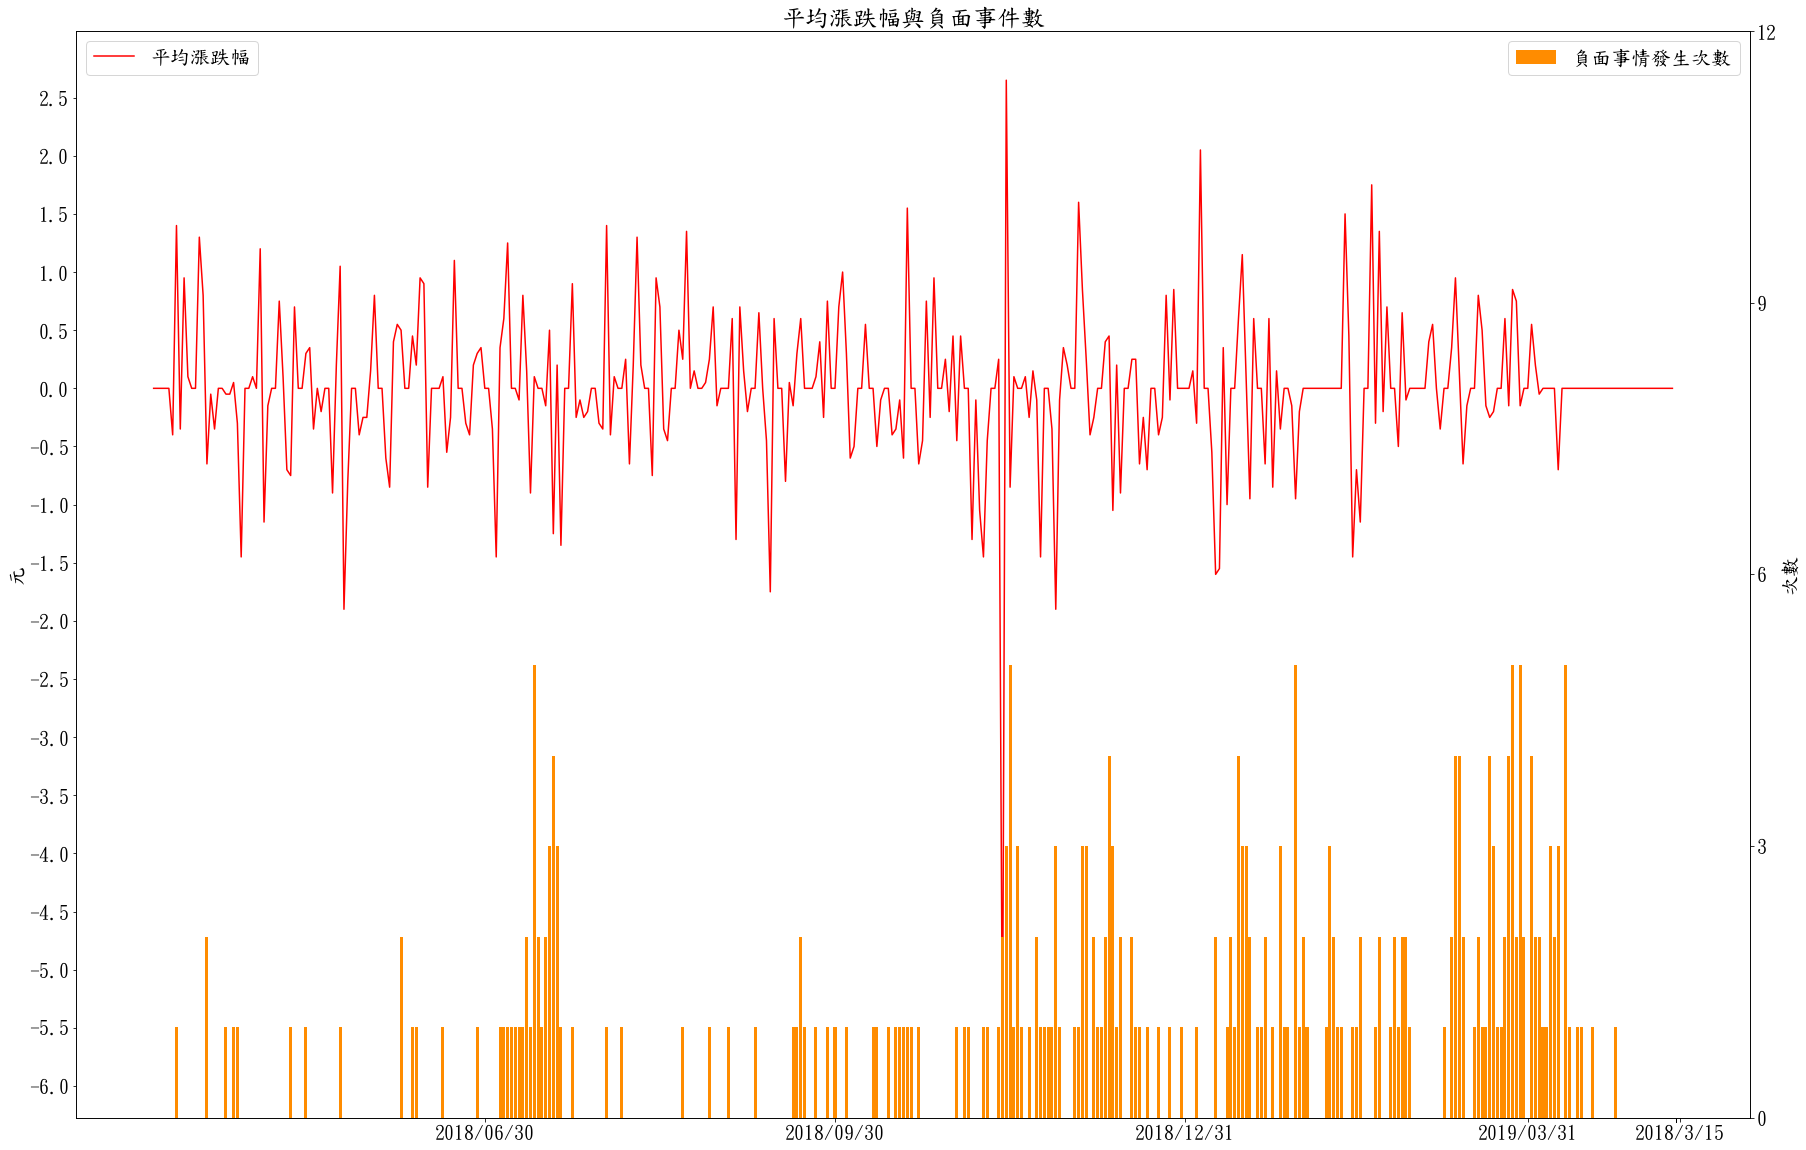

401


In [19]:
#ax5 = plt.subplot(3,2,5)
#ax6 = plt.subplot(3,2,6)
font = {'family' : 'DFKai-SB',
'weight' : 'bold',
'size'  : '20'} #字型設定
plt.rc('font', **font) #字型設定 # pass in the font dict as kwargs
plt.rc('axes',unicode_minus=False) #字型設定
fig = plt.figure(figsize=(30,20))
ax5 = fig.add_subplot(111)
#print(p_changing_list)
ax5.plot(p_if_working_day_list,color = 'red', label='平均漲跌幅')
#print(sort_tw_place)
ax5.legend(loc='upper right')
ax5.set_ylabel('元')
ax5.set_title("平均漲跌幅與負面事件數")
yaxis = np.arange(-6,3,0.5)
ax5.set_yticks(yaxis)
ax5.legend(loc='upper right')
#plt.sca(ax6)
#print(total_negative_counts_date)
#total_negative_counts_day_list = []
ax6 = ax5.twinx()  # this is the important function
ax6.bar(p_total_negative_counts_date,p_total_negative_counts_day_dict_values,color = 'darkorange',label='負面事情發生次數')
ax6.legend(loc='upper right')
ax6.set_ylabel('次數')
yaxis = np.arange(0,15,3)
#plt.ylim(0,20)
ax5.legend(loc='upper left')
ax6.set_yticks(yaxis)
plt.xticks(p_xaxis_list)
# ax6.set_xticks(p_xaxis_list)
plt.legend()
plt.show()
print(len(p_xaxis_list))

9.整理結論、提出假設
直覺上，從圖表可目測得知 ，負面事件發生時的台灣元大50etf的交易股數、收盤價、交易筆數的平均、標準差會跟三年內總平均和標準差雷同。但是負面事件發生時的台灣元大50etf的漲幅卻明顯小於三年內總平均且標準差較大。
若投資台灣元大50etf時可預知類似國際事件將有重要轉折和新聞將會會發生，則發生時漲幅可能會低於日常狀態，且漲跌幅較為劇烈。綜合而言，該情境下更可能面對較大規模的虧損，但較不會出現高於日常預期的獲利。

10.未來展望
有時標準差相對較小，平均差異看似不大，但其實負面事件發生時的台灣元大50etf的交易股數、收盤價、交易筆數會落在平時常態分佈的極端。
反觀漲跌幅的平均雖有明顯落差，但三年總標準差較大，反而不一定落在平時常態分佈的極端。
未來可能會計算負面事件發生時的台灣元大50etf的交易股數、收盤價、交易筆數、漲跌幅的z值，找出該交易現象發生的罕見程度。
也希望針對要再思考的主題做更多有利於判斷的視覺化。

心得回顧
1. 爬蟲cnn的內容不夠理想，現在的以歐洲、運動、少數國際政治為主。
2. 一開始測試程式時不要運算全部資料，先測試一部分即可，不然製作圖表和運算的速度會很慢。
3. 大量資料製作出的圖表不一定有利於視覺化判斷，如圖「平均漲跌幅與負面事件數」，很難做也看不出趨勢。
4. 圖表的x軸若為日期軸，則須注意間距，相當不好調整和有效顯示，之後可以研究是否有比重作一份x軸更好的方法。


第四次作業
Step1:
找出負面事件發生時，該天交易資訊發生的罕見程度 P-value 比該數據更高或更低的比率
Step2:
探討交易資訊與負面事件是否有回歸相關，是否有意義，因為還有其他干擾事件
Step3:
探討是否有負面事件發生時的交易資訊是否會聚焦於特定群體cluster?
將所有交易資訊與發生負面事件時的交易數據先後用kmeans分群
先決定哪兩項交易資訊當xy軸->分群->那些有負面事件發生時的交易資訊自成一群->與特定族群的重疊率->找出哪兩項交易資訊當xy軸時容易有共同群組
step4:
找其他能更可靠定義負面事件發生的辦法，辨別同樣負面事件不同階段的影響


In [20]:
#---------有實際完整數據，之後再考慮用p value統計
import numpy as np
import scipy.stats as st
import scipy.special as sp
pval = st.norm.cdf(1)
print(pval)

0.8413447460685429


No handles with labels found to put in legend.


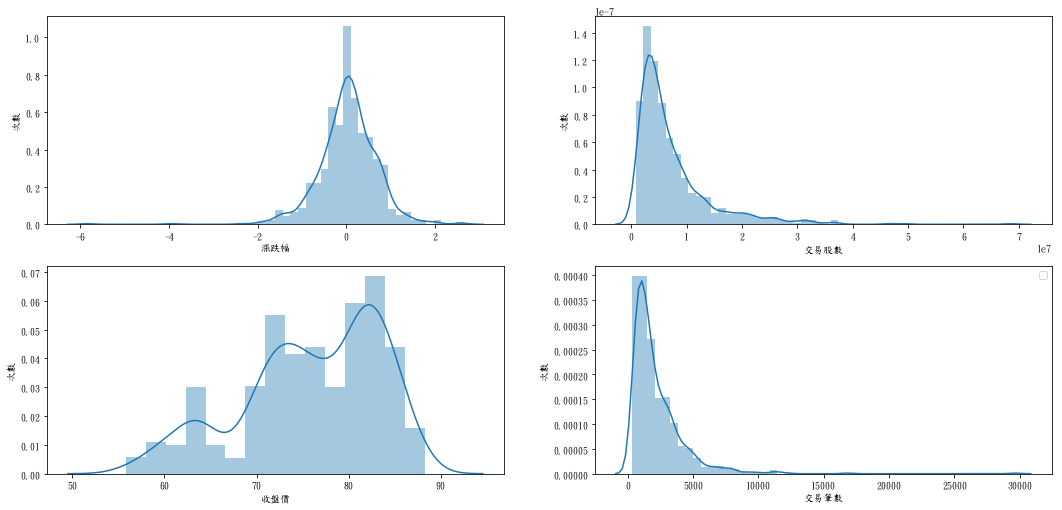

In [21]:
#---------觀察etf數據是否近似常態
# trading_shares_list = []
# changing_list = []
# end_price_list = []
# number_of_deals_list
import seaborn as sns
font = {'family' : 'DFKai-SB',
'weight' : 'bold',
'size'  : '10'} #字型設定
plt.rc('font', **font) #字型設定 # pass in the font dict as kwargs
plt.rc('axes',unicode_minus=False) #字型設定
plt.subplots(figsize=(18,13)) #圖形大小
ax1 = plt.subplot(3,2,1)  #子圖們
#第一行第二列图形
ax2 = plt.subplot(3,2,2)
ax3 = plt.subplot(3,2,3)
ax4 = plt.subplot(3,2,4)
all_changing_list = []
for y in range(2,796):
    changing = sheet_1.cell_value(rowx=y,colx=7)
    if "-" in changing:
        changing = changing[-4]+changing[-3]+changing[-2]+changing[-1]
        changing = float(changing)
        changing = changing*(-1)
    else:
        changing = changing[-4]+changing[-3]+changing[-2]+changing[-1]
    all_changing_list.append(float(changing))
plt.sca(ax1)
sns.distplot(all_changing_list)
plt.xlabel('漲跌幅')  
plt.ylabel('次數')  
plt.sca(ax2)
sns.distplot(trading_shares_list)
plt.xlabel('交易股數')  
plt.ylabel('次數')  
plt.sca(ax3)
sns.distplot(end_price_list)
plt.xlabel('收盤價')  
plt.ylabel('次數')  
plt.sca(ax4)
sns.distplot(number_of_deals_list)
plt.xlabel('交易筆數')  
plt.ylabel('次數')  
plt.legend()
plt.show()

由上圖可知漲跌幅呈現常態分布，但其他三項交易數據則否，故優先以漲跌幅來計算負面事件發生時之漲跌幅發生的機率

In [22]:
# print("normal_mean:       ",mean_trading_shares,mean_changing,mean_end_price,mean_number_of_deals)
# print("normal_stdev :     ",stdev_trading_shares,stdev_changing,stdev_end_price,stdev_number_of_deals)
# print("total_negative_mean:",mean_trading_shares_total_negative,mean_changing_total_negative,mean_end_price_total_negative,mean_number_of_deals_total_negative)
# print("total_negative_stdev:",stdev_trading_shares_total_negative,stdev_changing_total_negative,stdev_end_price_total_negative,stdev_number_of_deals_total_negative)
# print("brexit_mean:       ",mean_trading_shares_brexit,mean_changing_brexit,mean_end_price_brexit,mean_number_of_deals_brexit)
# print("brexit_stdev:     ",stdev_trading_shares_brexit,stdev_changing_brexit,stdev_end_price_brexit,stdev_number_of_deals_brexit)
mean_data_list_normal = [mean_trading_shares,mean_changing,mean_end_price,mean_number_of_deals]
mean_data_list_negative = [mean_trading_shares_total_negative,mean_changing_total_negative,mean_end_price_total_negative,mean_number_of_deals_total_negative]
mean_data_list_brexit = [mean_trading_shares_brexit,mean_changing_brexit,mean_end_price_brexit,mean_number_of_deals_brexit]
stdev_data_list_normal = [stdev_trading_shares,stdev_changing,stdev_end_price,stdev_number_of_deals]
stdev_data_list_negative = [stdev_trading_shares_total_negative,stdev_changing_total_negative,stdev_end_price_total_negative,stdev_number_of_deals_total_negative]
stdev_data_list_brexit = [stdev_trading_shares_brexit,stdev_changing_brexit,stdev_end_price_brexit,stdev_number_of_deals_brexit]
#----計算negative和brexit的z score
z_score_negative_event_list = []
z_score_brexit_list = []
for j in range(4):
    negative_z_score = (float(mean_data_list_negative[j]) - float(mean_data_list_normal[j]))/float(stdev_data_list_normal[j])
    z_score_negative_event_list.append(negative_z_score)
    brexit_z_score = (float(mean_data_list_brexit[j]) - float(mean_data_list_normal[j]))/float(stdev_data_list_normal[j])
    z_score_brexit_list.append(brexit_z_score)
print(z_score_negative_event_list)
print(z_score_brexit_list)

[0.04368918236474369, -0.8995063556464341, 0.12540504242840317, 0.06945471724107771]
[0.1016849957211942, -0.8094234377861458, 0.01649550679347159, 0.07259460075986196]


In [23]:
import scipy.stats as st
z_score_of_brexit_changing = z_score_brexit_list[1]
z_score_of_negative_event_changing = z_score_negative_event_list[1]
probability_brexit_changing = st.norm.cdf(z_score_of_brexit_changing)
probability_negative_event_changing = st.norm.cdf(z_score_of_negative_event_changing)
print('brexit事件發生時漲跌幅的機率',probability_brexit_changing)
print('negative_event事件發生時漲跌幅的機率',probability_negative_event_changing)

brexit事件發生時漲跌幅的機率 0.20913581260485314
negative_event事件發生時漲跌幅的機率 0.18419150600533696


In [ ]:
#------------------------已完成，勿再執行此程式----------檔案更名為ETF0050
import os
import json, csv
import re
import time
from xlwt import *
#import xlwt
file = Workbook(encoding = 'utf-8')
#指定file以utf-8的格式打开
table = file.add_sheet('data')
col = 0
row = 1
m = 0
stock_num_list = ['0050']
year_count_list = ["2016",'2017','2018']
month_count_list = ['01','02','03','04','05','06','07','08','09','10','11','12']
spe_2019_month_count_list = ['01','02','03','04']
fields = ["日期","成交股數","成交金額","開盤價","最高價","最低價","收盤價","漲跌價差","成交筆數"]
for m in range(9):
    table.write(row,m,fields[m])
for stock_num in stock_num_list:
    transaction_amount = []
    total_data_list = []
    change_list = []
    date_list = []
    for year_count in year_count_list:
        for month_count in month_count_list:
            time.sleep(6)
            url_twse = 'http://www.tse.com.tw/exchangeReport/STOCK_DAY?response=json&date=' + str(year_count) + str(month_count) +  '01&stockNo='+ str(stock_num) + '&_=1533353379536'
            res = requests.get(url_twse)
            s = json.loads(res.text)
            if s['stat'] == "OK":
                for data in (s['data']):
                    total_data_list.append(data)
                    #change_list.append(data[7])
                    if "," in data[8]:
                        data[8] = data[8].replace(",","")
                        #transaction_amount.append(float(data[8]))
                    else:
                        transaction_amount.append(float(data[8]))
                        #date_list.append(data[0])
                    row += 1
                    for j in range(9):
                        table.write(row,j,data[j])
    for month_count in spe_2019_month_count_list:
            time.sleep(6)
            url_twse = 'http://www.tse.com.tw/exchangeReport/STOCK_DAY?response=json&date=2019'+ str(month_count) +  '01&stockNo='+ str(stock_num) + '&_=1533353379536'
            res = requests.get(url_twse)
            s = json.loads(res.text)
            if s['stat'] == "OK":
                for data in (s['data']):
                    total_data_list.append(data)
                    #change_list.append(data[7])
                    if "," in data[8]:
                        data[8] = data[8].replace(",","")
                        #transaction_amount.append(float(data[8]))
                    else:
                        transaction_amount.append(float(data[8]))
                        #date_list.append(data[0])
                    row += 1
                    for j in range(9):
                        table.write(row,j,data[j])
file.save('C:\\Users\\Will\\Desktop\\datascience_upload\\te1.csv')